In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [2]:
from sklearn.datasets import load_breast_cancer


In [3]:
d=load_breast_cancer()
df=pd.DataFrame(d.data,columns=d.feature_names)

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df=df[["mean radius","mean texture"]]
y=d.target

In [6]:
df.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [7]:
x_train,x_test,y_train,y_test=train_test_split(df,y,test_size=0.2)


In [8]:
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
x_train=sl.fit_transform(x_train)
x_test=sl.transform(x_test)

In [9]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
model.score(x_test,y_test)

0.9210526315789473

In [11]:
y_pred=model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[39,  7],
       [ 2, 66]], dtype=int64)

<Axes: >

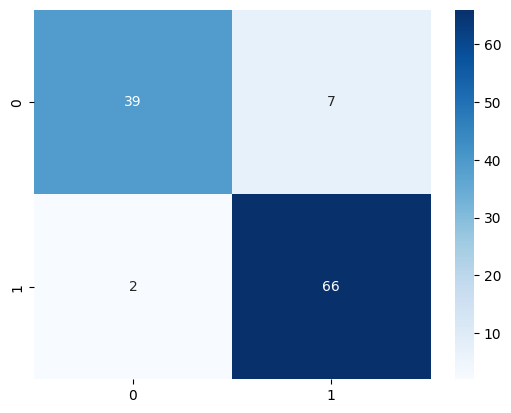

In [12]:
sb.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Blues")

In [13]:
from sklearn.metrics import classification_report

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        46
           1       0.90      0.97      0.94        68

    accuracy                           0.92       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



ValueError: `bins` must increase monotonically, when an array

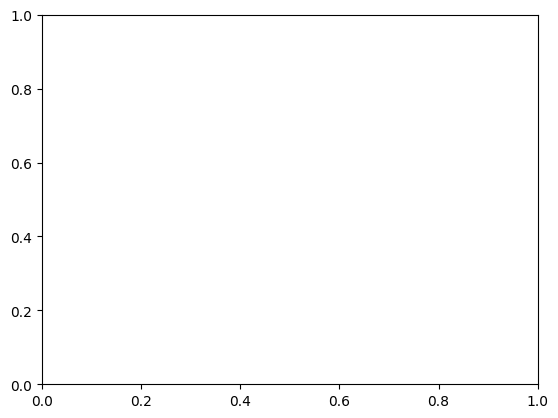

In [17]:
import matplotlib.pyplot as plt
plt.hist(x_test,y_test)
plt.plot(x_test,y_pred)